In [1]:
import torch
import torchio as tio

import matplotlib.pyplot as plt

from glob import glob

from torchio.transforms import (CropOrPad)
from torchio import transforms

import numpy as np

In [2]:
def showMultipleImage(data, outputname=None, cmap='gray'):

    step = data[0].shape[-1] // 50
    i = 0

    fig, ax = plt.subplots(5,10)

    for row in ax:
        for col in row:
            col.imshow(data[0][:, :, i], cmap=cmap); col.axis('off');
            i += step
    
    if outputname:
        plt.savefig(outputname)
    plt.show()
    plt.clf()

In [3]:
def showImage(data, outputname=None, cmap='gray'):
    fig = plt.figure(figsize=(3,3))
    plt.imshow(data[0][:, :, 72], cmap=cmap); plt.axis('off');
    
    if outputname:
        plt.savefig(outputname)
    plt.show()
    plt.clf()

In [4]:
dataset_path = 'datasets\\MsLesion_Data'

T1_paths = sorted(glob(f'{dataset_path}/*/*T1_to_MAG.nii'))[:1]
T2_paths = sorted(glob(f'{dataset_path}/*/*T2_to_MAG.nii'))[:1]
T2FLAIR_paths = sorted(glob(f'{dataset_path}/*/*T2FLAIR_to_MAG.nii'))[:1]
MASK_paths = sorted(glob(f'{dataset_path}/*/*T2FLAIR_to_MAG_ROI.nii'))[:1]

In [5]:
class RandomCrop3D(object):
    def __init__(self, img_sz, crop_sz):
        c, h, w, d = img_sz
        assert (h, w, d) > crop_sz
        self.img_sz  = tuple((h, w, d))
        self.crop_sz = tuple(crop_sz)
        
    def __call__(self, x):
        slice_hwd = [self._get_slice(i, k) for i, k in zip(self.img_sz, self.crop_sz)]
        return self._crop(x, *slice_hwd)
        
    @staticmethod
    def _get_slice(sz, crop_sz):
        try : 
            lower_bound = torch.randint(sz-crop_sz, (1,)).item()
            return lower_bound, lower_bound + crop_sz
        except: 
            return (None, None)
    
    @staticmethod
    def _crop(x, slice_h, slice_w, slice_d):
        return x[:, slice_h[0]:slice_h[1], slice_w[0]:slice_w[1], slice_d[0]:slice_d[1]]

In [6]:
from lib.augment3D.random_crop_or_pad import RandomCropOrPad

pad :  0 0 	 crop :  99.0 17.0
pad :  0 0 	 crop :  128.0 48.0
pad :  21.0 67.0 	 crop :  0 0


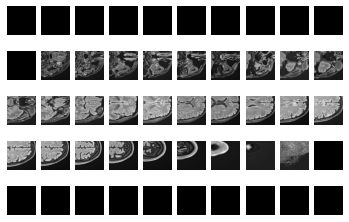

pad :  0 0 	 crop :  111.0 5.0
pad :  0 0 	 crop :  128.0 48.0
pad :  0 111.0 	 crop :  23.0 0


<Figure size 432x288 with 0 Axes>

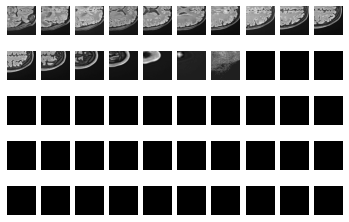

pad :  0 0 	 crop :  51.0 65.0
pad :  0 0 	 crop :  93.0 83.0
pad :  19.0 69.0 	 crop :  0 0


<Figure size 432x288 with 0 Axes>

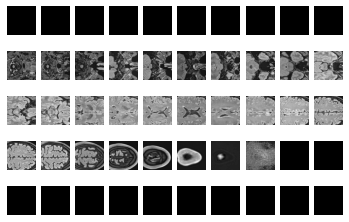

pad :  0 0 	 crop :  86.0 30.0
pad :  0 0 	 crop :  121.0 55.0
pad :  0 98.0 	 crop :  10.0 0


<Figure size 432x288 with 0 Axes>

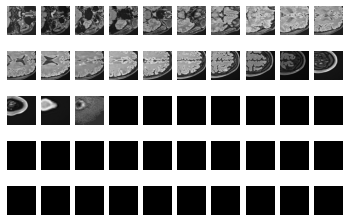

pad :  0 0 	 crop :  84.0 32.0
pad :  0 0 	 crop :  106.0 70.0
pad :  17.0 71.0 	 crop :  0 0


<Figure size 432x288 with 0 Axes>

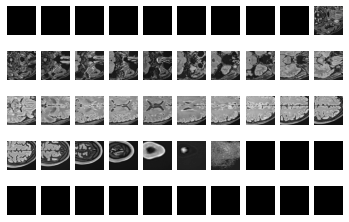

pad :  0 0 	 crop :  68.0 48.0
pad :  0 0 	 crop :  140.0 36.0
pad :  0 96.0 	 crop :  8.0 0


<Figure size 432x288 with 0 Axes>

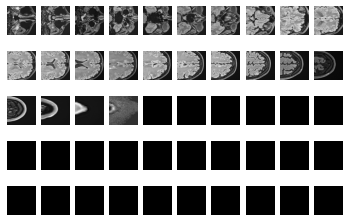

pad :  0 0 	 crop :  54.0 62.0
pad :  0 0 	 crop :  111.0 65.0
pad :  19.0 69.0 	 crop :  0 0


<Figure size 432x288 with 0 Axes>

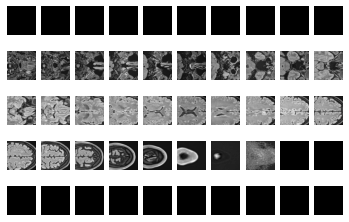

pad :  0 0 	 crop :  60.0 56.0
pad :  0 0 	 crop :  80.0 96.0
pad :  0 112.0 	 crop :  24.0 0


<Figure size 432x288 with 0 Axes>

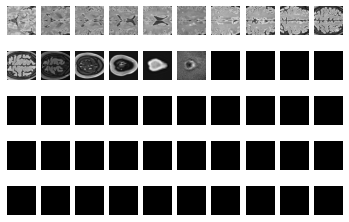

pad :  0 0 	 crop :  80.0 36.0
pad :  0 0 	 crop :  93.0 83.0
pad :  25.0 63.0 	 crop :  0 0


<Figure size 432x288 with 0 Axes>

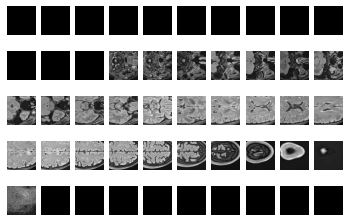

pad :  0 0 	 crop :  103.0 13.0
pad :  0 0 	 crop :  112.0 64.0
pad :  36.0 52.0 	 crop :  0 0


<Figure size 432x288 with 0 Axes>

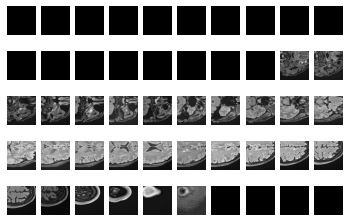

<Figure size 432x288 with 0 Axes>

In [7]:
for path in zip(T1_paths, T2_paths, T2FLAIR_paths, MASK_paths):
    
    t1 = path[0]
    t2 = path[1]
    t2f = path[2]
    m = path[3]
    
    subject = tio.Subject(
                    t1 = tio.ScalarImage(t1),
                    t2 = tio.ScalarImage(t2),
                    t2f = tio.ScalarImage(t2f),
                    mask = tio.LabelMap(m),
                )

    for i in range(10):

        transform = tio.Compose([
            # CropOrPad((224,224,224), mask_name='mask'),
            RandomCropOrPad( (144, 144, 144), mask_name='mask')
        ])

        transformed_subject = transform(subject)

        # showImage(transformed_subject.t2f.data)
        # showImage(transformed_subject.mask.data)

        showMultipleImage(transformed_subject.t2f.data)


In [8]:

subject.flair.data.shape

AttributeError: 'Subject' object has no attribute 'flair'

In [ ]:
from random import randint

randint(-2, 0)